In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Business Understanding
# Tujuan: Memprediksi kelulusan mahasiswa berdasarkan berbagai atribut



In [2]:
# 2. Data Understanding
# Membaca dataset
data = pd.read_csv('datakelulusanmahasiswa1.csv')

In [3]:
# Menampilkan informasi dasar tentang dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB
None
             UMUR       IPS 

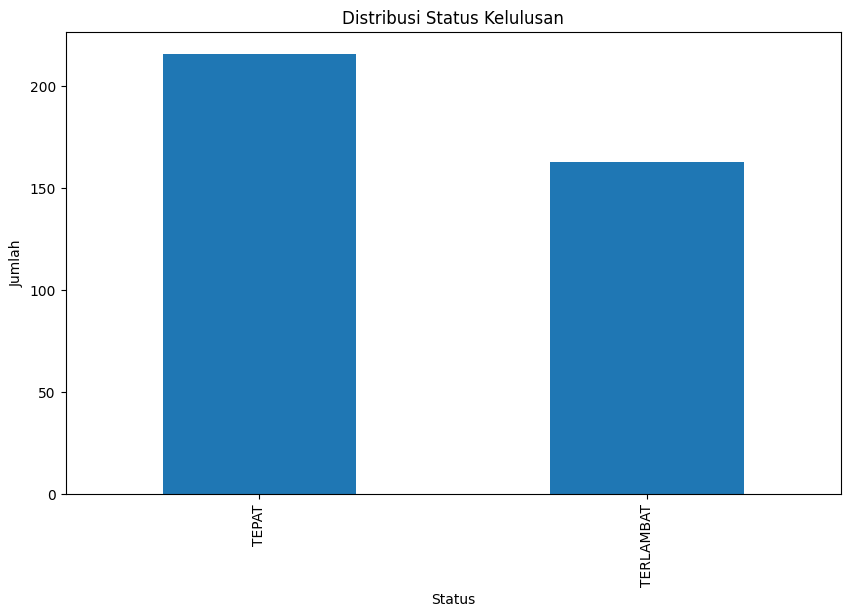

In [ ]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10, 6))
data['STATUS KELULUSAN'].value_counts().plot(kind='bar')
plt.title('Distribusi Status Kelulusan')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()


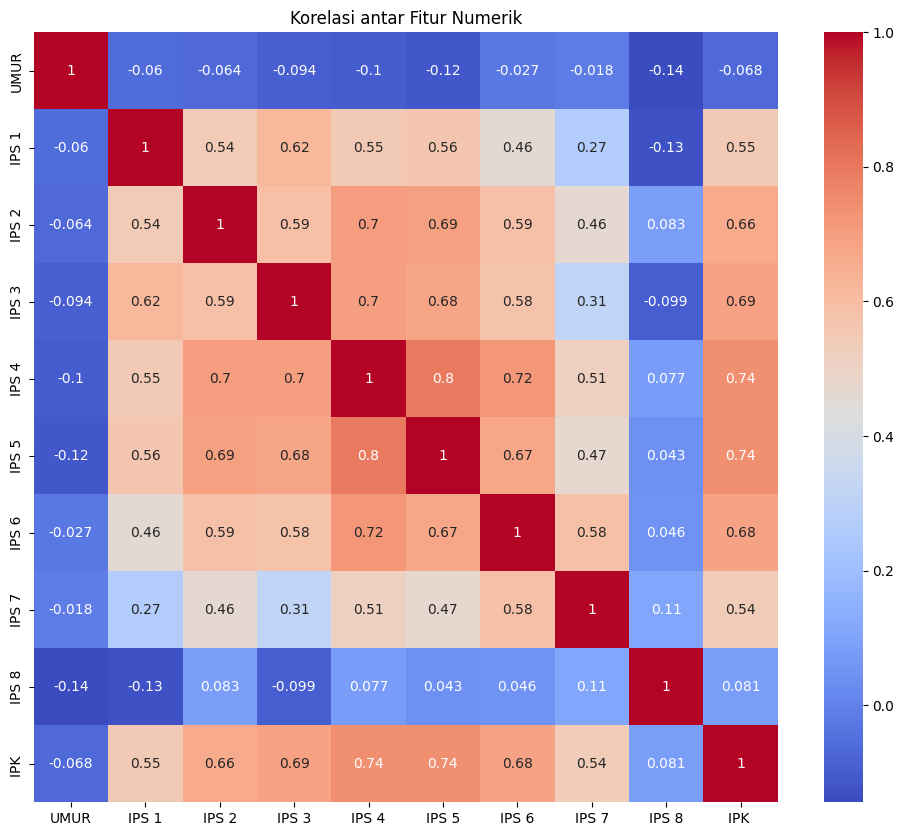

In [5]:

# Visualisasi korelasi antar fitur numerik
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

In [6]:
# 3. Data Preparation
# Cek missing values
print(data.isnull().sum())


NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64


In [10]:
# Mengganti nilai yang hilang dengan mean untuk kolom IPS 8 dan IPK
data['IPS 8'].fillna(data['IPS 8'].mean(), inplace=True)
data['IPK '].fillna(data['IPK '].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_15688\1050597993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IPS 8'].fillna(data['IPS 8'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15688\1050597993.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [11]:
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64


In [14]:
# Encoding variabel kategorikal
le = LabelEncoder()
categorical_columns = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


In [15]:

# Memisahkan fitur dan target
X = data.drop(['NAMA', 'STATUS KELULUSAN'], axis=1)
y = data['STATUS KELULUSAN']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 4. Modeling
# Mencoba dua model: Decision Tree dan Random Forest

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Mean CV Score:", dt_scores.mean())

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean CV Score:", rf_scores.mean())

# Memilih model dengan performa terbaik (dalam hal ini, Random Forest)
best_model = rf_model
best_model.fit(X_train, y_train)



Decision Tree Cross-Validation Scores: [0.86885246 0.7704918  0.8852459  0.8        0.83333333]
Decision Tree Mean CV Score: 0.831584699453552
Random Forest Cross-Validation Scores: [0.86885246 0.96721311 0.95081967 0.85       0.9       ]
Random Forest Mean CV Score: 0.9073770491803279


RandomForestClassifier(random_state=42)

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


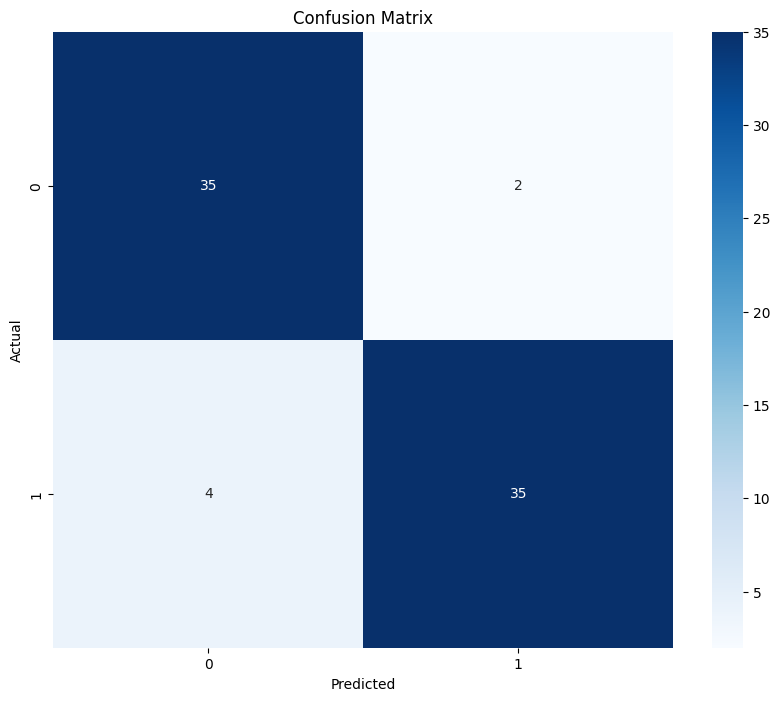

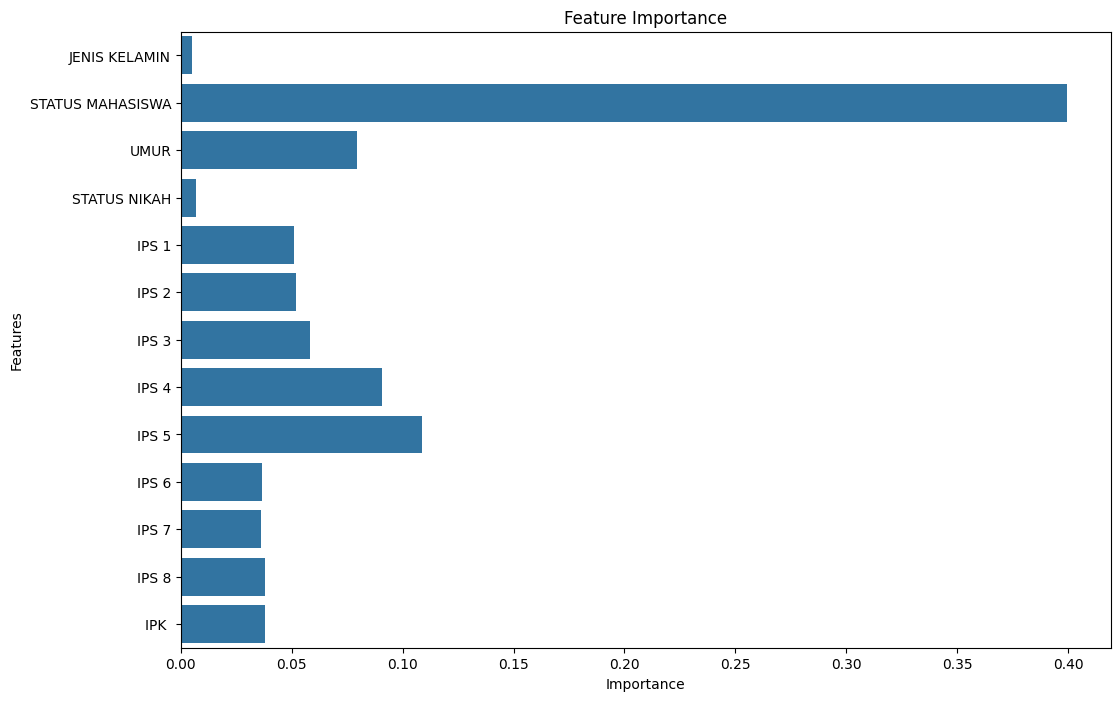

In [17]:
# 5. Evaluation
# Membuat prediksi
y_pred = best_model.predict(X_test)

# Menghitung metrik performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



In [18]:
# 6. Deployment
# Contoh prediksi menggunakan model
new_data = X_test.iloc[0].to_frame().T  # Mengambil satu baris data sebagai contoh
prediction = best_model.predict(new_data)
print(f"Prediksi untuk data baru: {'TEPAT' if prediction[0] == 1 else 'TERLAMBAT'}")

Prediksi untuk data baru: TERLAMBAT
